In [63]:
#!pip install scikit-image

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (100, 100) 

In [3]:
def load_data(directory):
    images = []
    labels = []
    
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return None
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            
            try:
                img = imread(img_path)
                img_resized = resize(img, IMAGE_SIZE, anti_aliasing=True)
                images.append(img_resized.flatten())
                
                label = filename.split('.')[0]
                if label == 'cat':
                    labels.append(0)
                elif label == 'dog':
                    labels.append(1)
                else:
                    print(f"Unexpected label in file: {filename}")
            
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    if not images or not labels:
        print(f"No images found in {directory}")
        return None

    return np.array(images), np.array(labels)

In [4]:
# train_dir = './addd'
# X_train, y_train = load_data(train_dir)

In [5]:
train_dir = './train'
X_train, y_train = load_data(train_dir)

KeyboardInterrupt: 

In [69]:
num_images_to_show = 4

Loaded 4 images with 4 labels


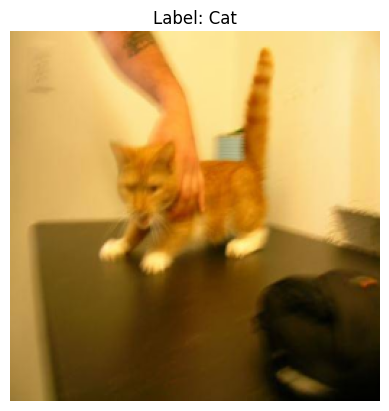

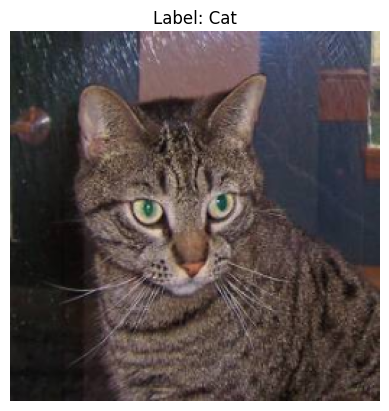

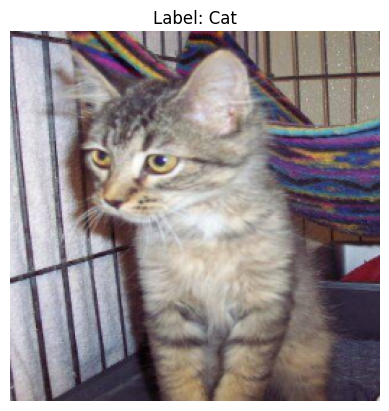

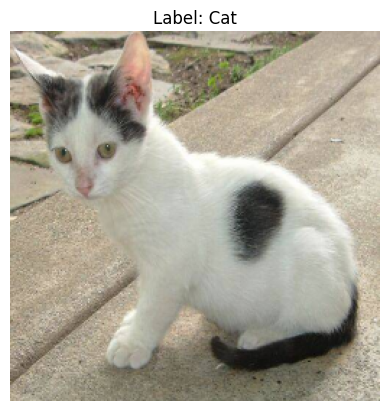

In [70]:
if X_train is not None and y_train is not None:
    print(f"Loaded {len(X_train)} images with {len(y_train)} labels")
    
    for i in range(num_images_to_show):
        img = X_train[i].reshape(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
        label = 'Cat' if y_train[i] == 0 else 'Dog'
        
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()
else:
    print("Data loading failed.")